## **Part A: Grab the data**

In [2]:
import pandas as pd
import numpy as np
url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/credit-risk/train.csv"
df_train = pd.read_csv(url)

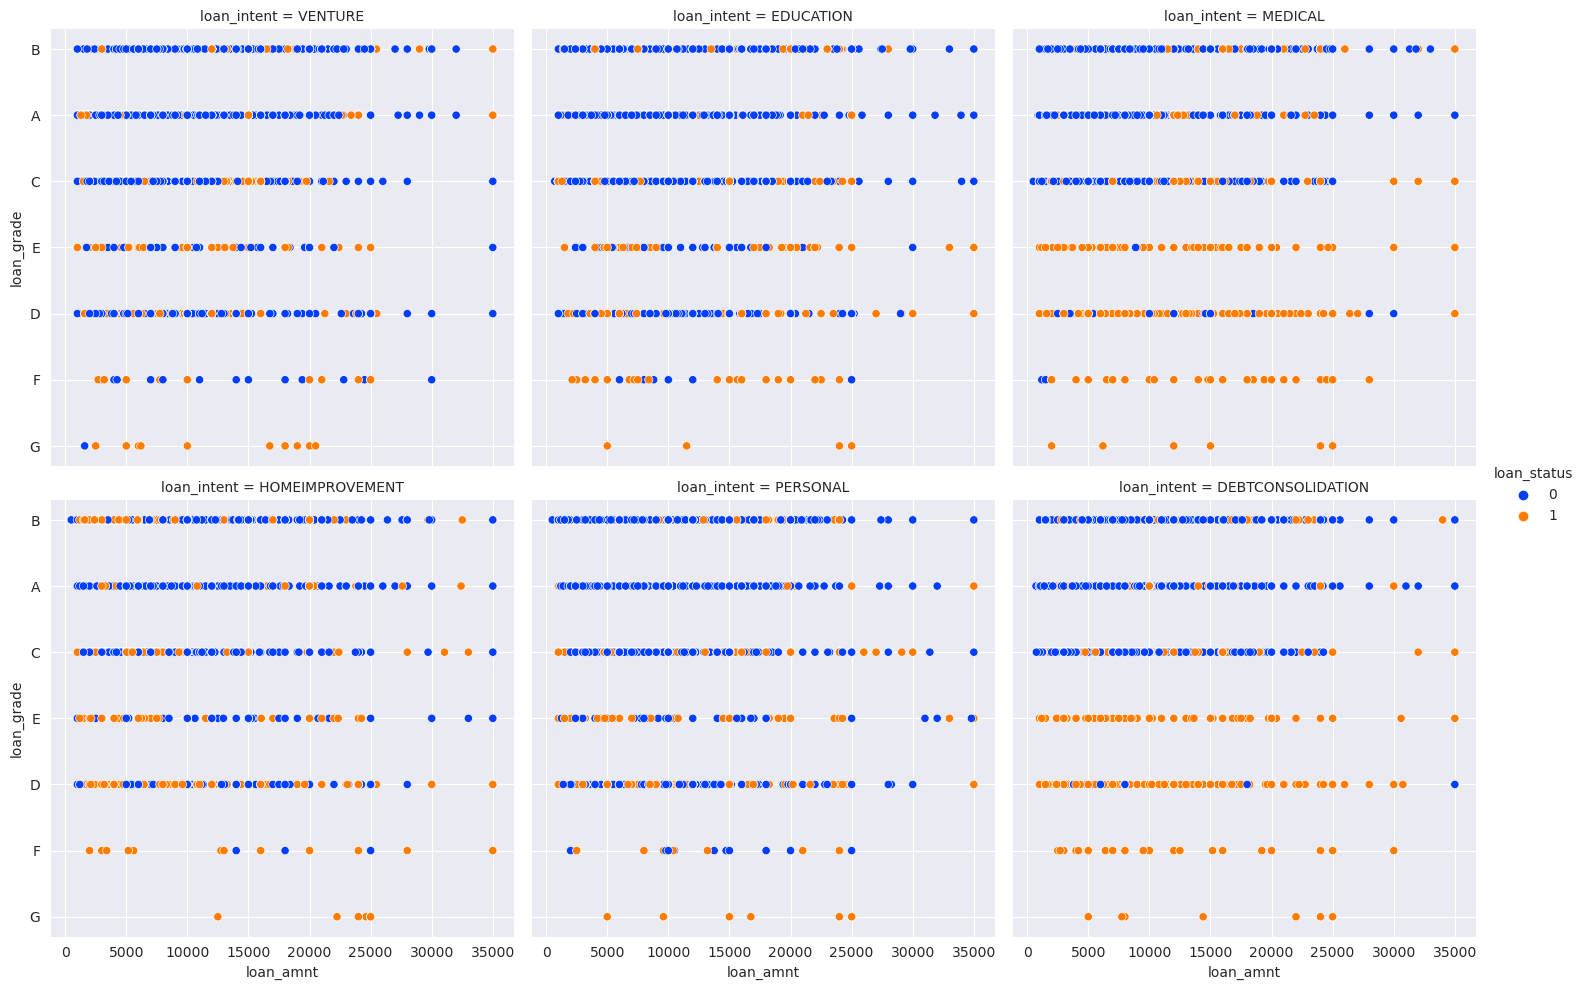

In [5]:
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.set_style("darkgrid")
sns.set_palette("bright")
sns.set_context

figure1 = sns.relplot(data=df_train, x="loan_amnt", y="loan_grade", col="loan_intent", hue ="loan_status", col_wrap=3)

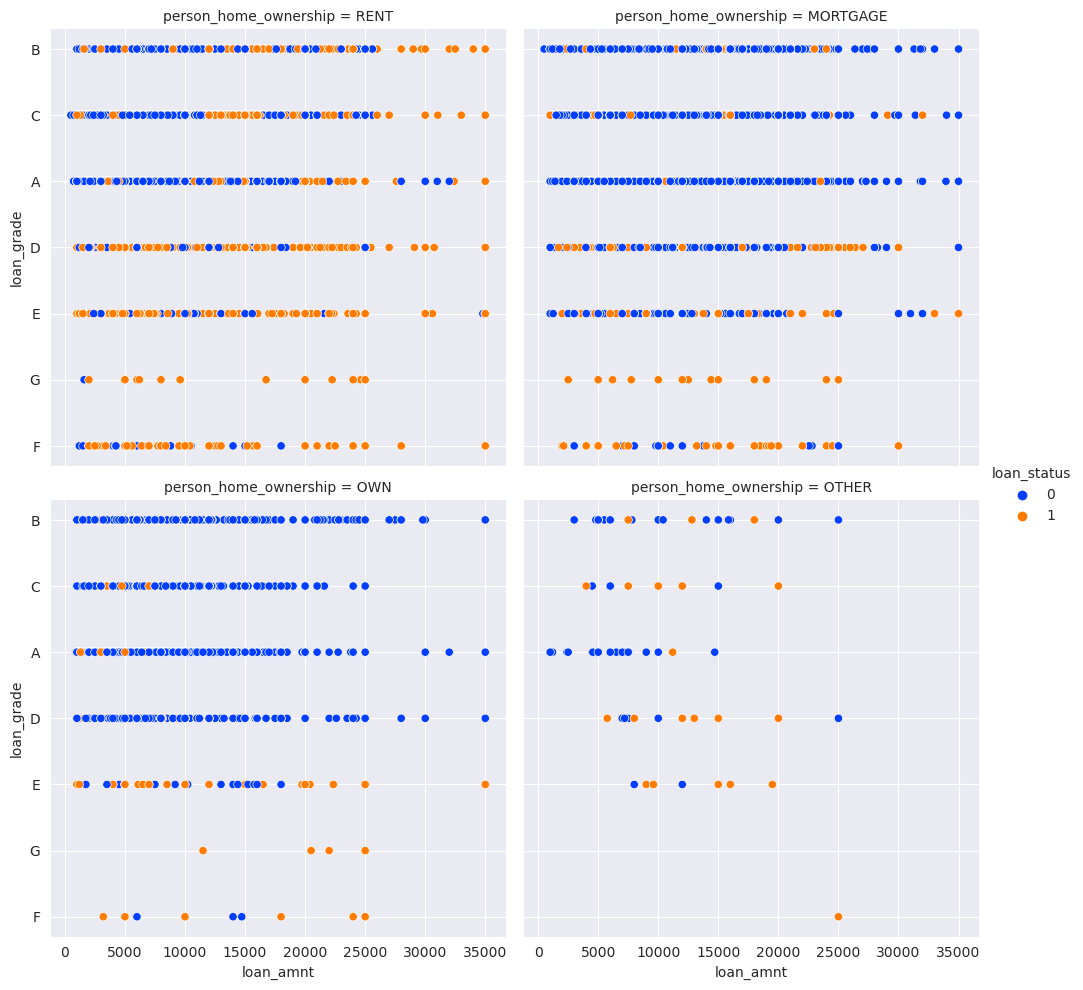

In [6]:
figure2 = sns.relplot(data=df_train, x="loan_amnt", y="loan_grade", col="person_home_ownership", hue ="loan_status", col_wrap=2)

Exploring new graphs, I want to potentially answer the questions

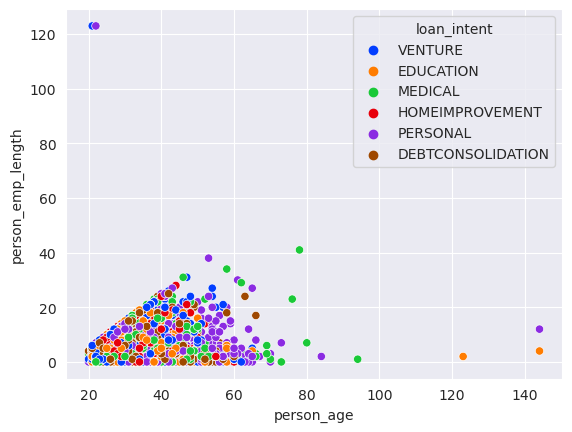

In [7]:
figure3=sns.scatterplot(data=df_train, x='person_age', y='person_emp_length', hue='loan_intent')

In [8]:
df_over_100_age = df_train[df_train['person_age']>100]
df_over_100_age

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1561,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
2043,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
6493,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
18067,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,N,25


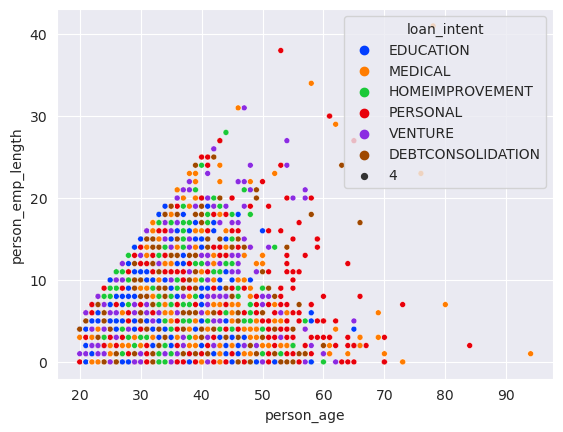

In [16]:
df_under_100_age_and_under_60_emp_years = df_train[(df_train['person_age']<100) & (df_train['person_emp_length']<60)]
figure4=sns.scatterplot(data=df_under_100_age_and_under_60_emp_years, x='person_age', y='person_emp_length', hue='loan_intent', size=4)

In [41]:
#18-24 #25-34 #35-44 45-64 65+ 
#lets make a summary table

#I want to see the average amount per age group
#these age bands are defined by the US 2020 census
#float('inf') is so we take into account all people above this value
df_under_100_age = df_train[(df_train['person_age']<100)]
age_bins = [18, 25, 35, 45, 65, float('inf')]
age_labels = ['18-24', '25-34', '35-44', '45-64', '65+']
df_under_100_age['age_band'] = pd.cut(df_under_100_age['person_age'], bins=age_bins, labels=age_labels, right=False)

most_common_intent_loan_by_age = df_under_100_age.groupby('age_band')['loan_intent'].agg(lambda x: x.value_counts().index[0])

/tmp/ipykernel_721153/2855218459.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_under_100_age['age_band'] = pd.cut(df_under_100_age['person_age'], bins=age_bins, labels=age_labels, right=False)
/tmp/ipykernel_721153/2855218459.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  most_common_intent_loan_by_age = df_under_100_age.groupby('age_band')['loan_intent'].agg(lambda x: x.value_counts().index[0])


In [45]:
summary_loan_intent_by_age = df_under_100_age.pivot_table(index='age_band', columns='loan_intent', aggfunc='size', fill_value=0)
print(most_common_intent_loan_by_age)
summary_loan_intent_by_age

age_band
18-24    EDUCATION
25-34      MEDICAL
35-44      MEDICAL
45-64     PERSONAL
65+        MEDICAL
Name: loan_intent, dtype: object


loan_intent,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
age_band,,,,,,
18-24,1559,2560,591,1708,1608,1811
25-34,2122,2052,1885,2505,2196,2224
35-44,413,434,355,508,424,491
45-64,81,76,71,100,169,86
65+,3,3,0,14,10,1
